# Learning curves

In [2]:
import numpy as np
import pandas as pd
# Import machine learning methods
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def plot_learning_curve(X, y, model):
    '''
    
    '''
    test_fraction = 0.25 # Use 25% of data for testing
    data_rows = X.shape[0]
    max_training_size = int(data_rows * (1 - test_fraction))
    print('Max training size: {}'.format(max_training_size))
    
    # Set up list to collect results
    results_training_size = []
    results_accuracy = []

    for train_size in range(10, max_training_size, 10):
        replicate_accuracy = []
        for replicate in range(10):
            # Split data into training and test
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size = test_fraction)

            # Reduce training set size (use np random choice for random index values)
            selection_index = np.random.choice(
                max_training_size, train_size, replace=False)
            X_train = X_train.iloc[selection_index]
            y_train = y_train.iloc[selection_index]

            # Fit model
            
            model.fit(X_train, y_train)

            # Predict test set
            y_pred_test = model.predict(X_test)

            # Get accuracy and record results
            accuracy = np.mean(y_pred_test == y_test)
            replicate_accuracy.append(accuracy)

        results_accuracy.append(np.mean(replicate_accuracy))
        results_training_size.append(train_size)
    # Calculate moving avergae (of last 5 points) with np.convolve
    moving_average = np.convolve(results_accuracy, np.ones((5,))/5, mode='valid')
    x_moving_average = results_training_size[2:-2] # Include offset to centre mean
    fig, ax = plt.subplots()
    ax.scatter(results_training_size, results_accuracy, 
             label='Accuracy')

    ax.plot(x_moving_average, moving_average,
            label='Moving average',
            color='orange',
            linewidth=3)

    plt.xlabel('Training set size')
    plt.ylabel('Test set accuracy')
    plt.legend()
    plt.grid(True)
    return fig

## 1.1. Start glucose, duration and logistic regression

In [49]:
filepath = '../../../Data/tidy_data/ml_during_glyc.csv'
df = pd.read_csv(filepath)
df.day_of_week = df.day_of_week.astype(str)
df.ID = df.ID.astype(str)
target_columns = ['y_hypo']

In [50]:
%%capture
X = df[['start_glc', 'duration']]
y = df[target_columns[0]]
# Create a logistic regression with the hyperparameters selected by Bayesian tuning
model = LogisticRegression(C=0.06662641355374649, solver='liblinear')
two_lr_curve = plot_learning_curve(X, y, model)

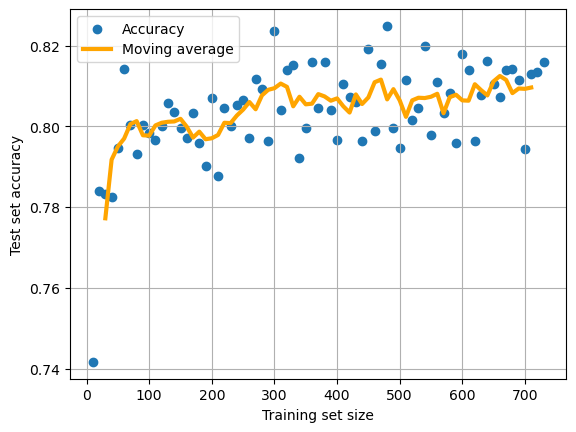

In [51]:
two_lr_curve

## Glycemic features with XGBoost

In [32]:
%%capture

X = df.drop(columns=target_columns+['stratify'])
y = df[target_columns[0]]
X = pd.get_dummies(X)
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

model = XGBClassifier()
glyc_xgb_curve = plot_learning_curve(X, y, model)

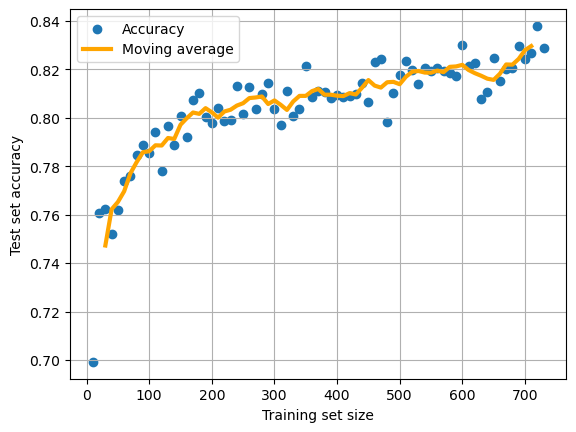

In [33]:
glyc_xgb_curve

## XGBoost with tsfresh features

In [ ]:
filepath = '../../../Data/tidy_data/ml_during_glyc_ts.csv'
df = pd.read_csv(filepath)
df.day_of_week = df.day_of_week.astype(str)
df.ID = df.ID.astype(str)
target_columns = ['y_hypo']

In [29]:
%%capture
X = df.drop(columns=target_columns+['stratify'])
y = df[target_columns[0]]
X = pd.get_dummies(X)
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

model = XGBClassifier()
ts_xgb_curve = plot_learning_curve(X, y, model)

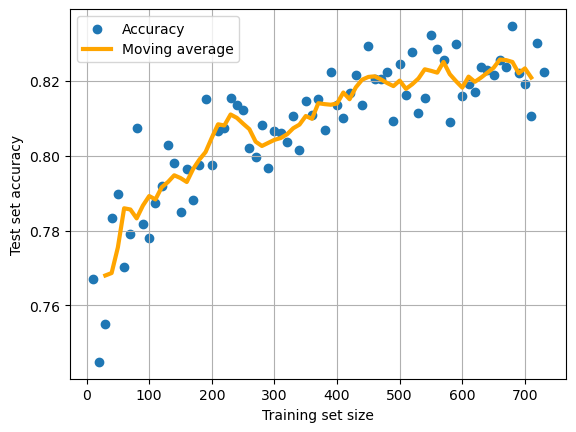

In [30]:
ts_xgb_curve